Linear Regression

The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution. In other words, a mathematical equation that gives the result directly. This is called the Normal Equation (Equation 4-4).  
Equation 4-4. Normal Equation  
θ = (X<sup>⊺</sup> X)<sup>−1</sup> X<sup>⊺</sup> y  
In this equation:  
θ is the value of θ that minimizes the cost function.  
y is the vector of target values containing y(1) to y(m).  
Let’s generate some linear-looking data to test this equation on (Figure 4-1)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

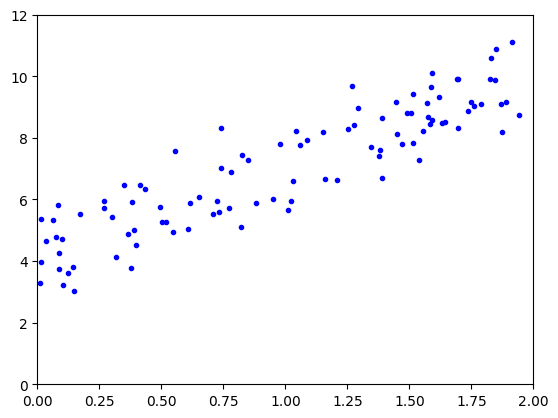

In [44]:
plt.axis([0, 2, 0, 12])
plt.plot(X, y, "b.")

In [45]:
X_b = np.c_[np.ones((100, 1)), X] # x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function we used to calculate y values is 4 + 3 * X + random(Gaussian noise).  
Lets see what the equation found:

In [46]:
theta_best

array([[4.16985465],
       [2.91206967]])

We would have hoped for θ0 = 4 and θ1 = 3. Close enough, but the noise made it impossible to recover the exact parameters of the original function. Now lets make predictions using θ:

In [47]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.16985465],
       [9.99399399]])

Let’s plot this model’s predictions

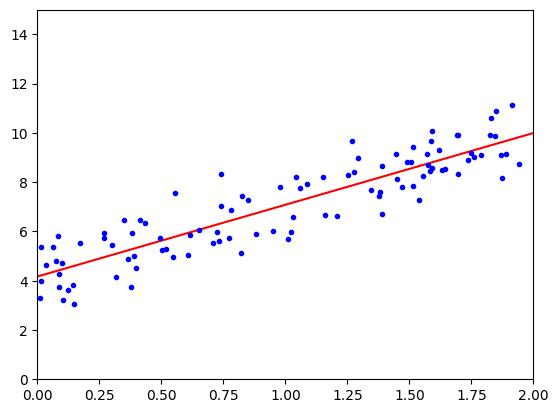

In [48]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple: 

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.16985465]), array([[2.91206967]]))

In [50]:
lin_reg.predict(X_new)

array([[4.16985465],
       [9.99399399]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

In [51]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.16985465],
       [2.91206967]])

This function computes θ = X<sup>+</sup>y,  
where X<sup>+</sup> is the pseudoinverse of X (specifically, the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [33]:
np.linalg.pinv(X_b).dot(y)

array([[4.00626225],
       [2.9822684 ]])

The pseudoinverse itself is computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices U Σ V⊺
(see
numpy.linalg.svd()). The pseudoinverse is computed as X+ = V Σ+ U⊺.  
To compute
the matrix Σ+, the algorithm takes Σ and sets to zero all values smaller than a tiny
threshold value, then it replaces all the nonzero values with their inverse, and finally
it transposes the resulting matrix. This approach is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix X⊺X is not invertible (i.e., singular), such as if m < n or if some
features are redundant, but the pseudoinverse is always defined.


Computational Complexity
The Normal Equation computes the inverse of X⊺ X, which is an (n + 1) × (n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n<sup>2.4</sup>) to O(n<sup>3</sup>), depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly 2<sup>2.4</sup> = 5.3 to 2<sup>3</sup> = 8.
The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n<sup>2</sup>). If you double the number of features, you multiply the computation time by roughly 4.

Note:  
Both the Normal Equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). On the
positive side, both are linear with regard to the number of instances
in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory.

Also, once you have trained your Linear Regression model (using the Normal Equation or any other algorithm), predictions are very fast: the computational complexity
is linear with regard to both the number of instances you want to make predictions
on and the number of features. In other words, making predictions on twice as many
instances (or twice as many features) will take roughly twice as much time.
Now we will look at a very different way to train a Linear Regression model, which is
better suited for cases where there are a large number of features or too many training
instances to fit in memory.